# Logistic Regression_분류

- 분류 문제는 0또는 1로 예측해야 하나 Linear Regression을 그대로 적용하면 예측값
h(x)는 0보다 작거나 1보다 큰 값을 가질 수 있음
- h(x)가 항상 0에서 1사이의 값을 갖도록 모델의 함수를 수정 -> sigmoid

$$h{θ}(x) = g(θ{0} + θ{1}x) = \frac{1}{1 + e^-{(θ{0} + θ{1}x)}}$$
$$g(x) = \frac{1}{1 + e^{-x}}$$


In [1]:
import numpy as np

z = np.arange(-10, 10, 0.01)
g = 1/(1+np.exp(-z))

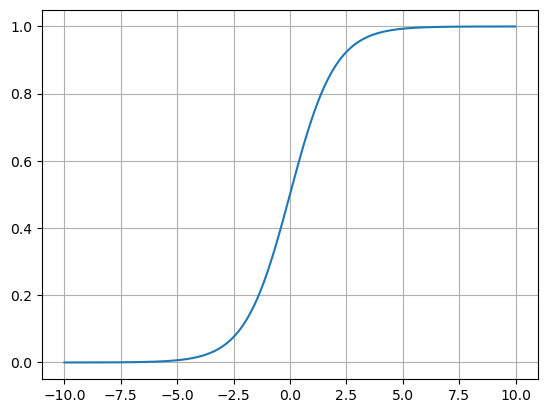

In [2]:
import matplotlib.pyplot as plt 

plt.plot(z,g)
plt.grid()

번외 : 그래프 디테일 잡기

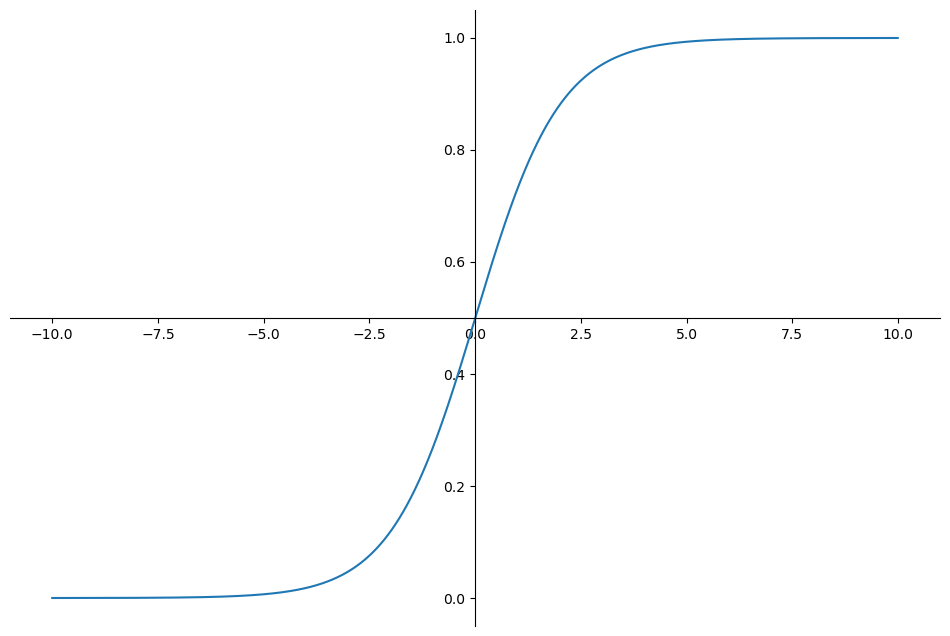

In [5]:
plt.figure(figsize=(12,8))
ax = plt.gca() #설정값을 변경할 수 있는 함수

#설정 하나씩 추가
ax.plot(z,g)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')


plt.show()

#나중에 자주쓰는 설정들을 함수로 만들어서 호출하면 효율적임

만약 $h{θ}(x)$가 0.7이라면 1이될 확률이 70%인 것이다.

Cost Function은 어떻게?
- Logistic Regression에서는 Cost Function이 깔끔한 2차함수가 아니다. 
재정의 할 필요가 있음

Logistic Reg Cost Function의 그래프 확인

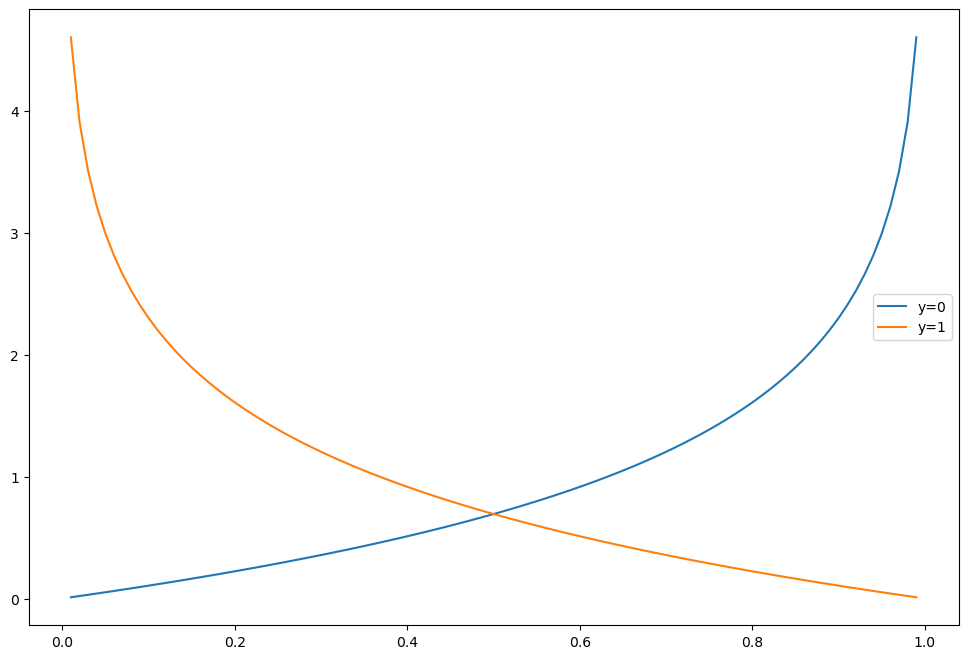

In [8]:
h = np.arange(0.01,1, 0.01)

c0 = -np.log(1-h)
c1 = -np.log(h)

plt.figure(figsize=(12,8))
plt.plot(h, c0, label='y=0')
plt.plot(h, c1, label='y=1')
plt.legend()
plt.show()

---

# 실습

In [10]:
import pandas as pd 
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url,sep=',',index_col=0)
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [11]:
wine['taste'] = [1 if quality >5 else 0 for quality in wine['quality']]

X = wine.drop(['taste','quality'],axis=1)
Y = wine.taste

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=13)

로지스틱 회귀 테스트

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train,y_train)

LogisticRegression(random_state=13, solver='liblinear')

***solver 파라미터***

solver 파라미터는 로지스틱 회귀 모델을 최적화하는 데 사용되는 알고리즘을 지정합니다. 

Scikit-learn에서 지원하는 solver 옵션은 다음과 같습니다:

- 'newton-cg': 뉴턴 방법을 사용하여 최적화를 수행합니다. 이 방법은 Hessian 행렬을 계산하므로 메모리 사용량이 많습니다.
- 'lbfgs': 제한된 메모리 BFGS (L-BFGS) 알고리즘을 사용하여 최적화를 수행합니다. 이 방법은 메모리 사용량이 적고 빠르게 수렴합니다.
- 'liblinear': 선형 SVM 솔버를 사용하여 최적화를 수행합니다. 이 방법은 대규모 데이터셋에 적합합니다.
- 'sag': 확률적 평균 경사 하강법(Stochastic Average Gradient)을 사용하여 최적화를 수행합니다. 이 방법은 대규모 데이터셋에 적합합니다.
- 'saga': SAG 솔버의 확장 버전으로, 희소 데이터에 더 잘 작동합니다.

In [16]:
y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc:',accuracy_score(y_train,y_pred_tr))
print('Test Acc:',accuracy_score(y_test,y_pred_test))

Train Acc: 0.7425437752549547
Test Acc: 0.7438461538461538


스케일러 적용해서 파이프라인 구축

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [20]:
estimator=[
    ('scaler',StandardScaler()),
    ('clf',LogisticRegression(solver='liblinear',random_state=13))
]

pipe = Pipeline(estimator)

In [21]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [22]:
y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc:',accuracy_score(y_train,y_pred_tr))
print('Test Acc:',accuracy_score(y_test,y_pred_test))

Train Acc: 0.7444679622859341
Test Acc: 0.7469230769230769


Decision Tree VS Logistic Reg

In [23]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2,random_state=13)
wine_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [24]:
models = {
    'logistic regression' : pipe,
    'decision tree' : wine_tree
}

AUC를 통해 비교

In [25]:
from sklearn.metrics import roc_curve

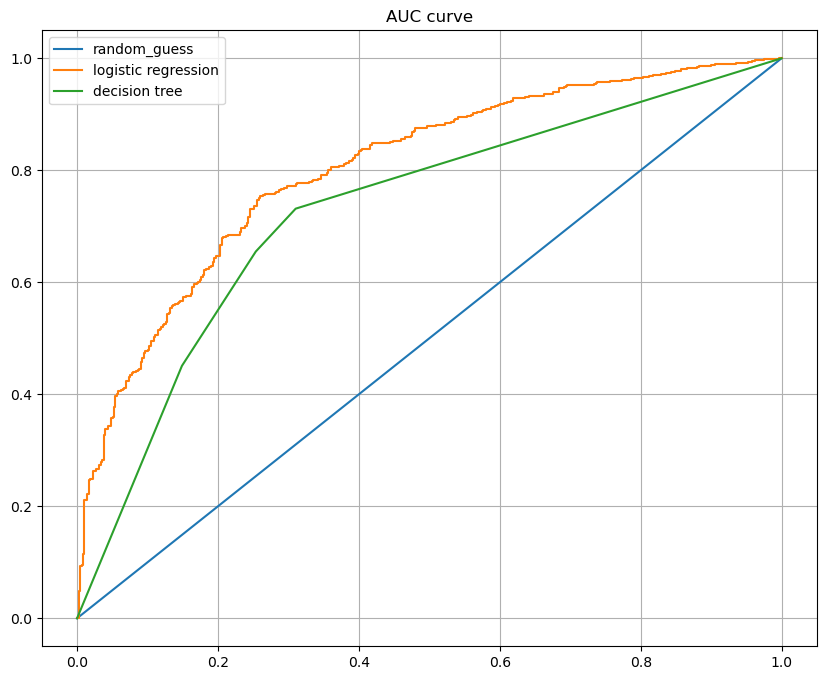

In [28]:
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],label = 'random_guess') #기준선

for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_test,pred)

    plt.plot(fpr,tpr,label = model_name)



plt.grid()
plt.legend()
plt.title('AUC curve')
plt.show()

확인해 보니 Logistic Reg 모델이 조금 더 성능이 좋은 것을 볼 수 있다.